In [32]:
import numpy as np
import pandas as pd
from prophet import Prophet
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from statsmodels.tsa.statespace.sarimax import SARIMAX
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Load your data into a DataFrame
data = pd.read_csv('Global_sea_level_rise.csv')
data = data[['date', 'sealevel']]  # Corrected column name
data = data.dropna()

# Convert date column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Calculate the range of the target variable
y_range = data['sealevel'].max() - data['sealevel'].min()

# Initialize the models
adaboost_model = AdaBoostRegressor(n_estimators=100, random_state=0)
ets_model = ETSModel(data['sealevel'], error='add', trend='add', seasonal='add', seasonal_periods=12)
prophet_model = Prophet(yearly_seasonality=True)
sarima_model = SARIMAX(data['sealevel'], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
lgbm_model = LGBMRegressor()

# Fit the models
adaboost_model.fit(data[['date']], data['sealevel'])
ets_fit = ets_model.fit()
prophet_model.fit(data.rename(columns={'date': 'ds', 'sealevel': 'y'}))  # Rename columns for Prophet
sarima_fit = sarima_model.fit(disp=False)
lgbm_model.fit(data.index.values.reshape(-1, 1), data['sealevel'])

# Make predictions
adaboost_pred = adaboost_model.predict(data[['date']])
ets_pred = ets_fit.forecast(steps=len(data))
prophet_pred = prophet_model.predict(data.rename(columns={'date': 'ds'}))
sarima_pred = sarima_fit.get_forecast(steps=len(data)).predicted_mean
lgbm_pred = lgbm_model.predict(data.index.values.reshape(-1, 1))

# Calculate Mean Absolute Error for each model
mae_adaboost = mean_absolute_error(data['sealevel'], adaboost_pred)
mae_ets = mean_absolute_error(data['sealevel'], ets_pred)
mae_prophet = mean_absolute_error(data['sealevel'], prophet_pred['yhat'].values)
mae_sarima = mean_absolute_error(data['sealevel'], sarima_pred)
mae_lgbm = mean_absolute_error(data['sealevel'], lgbm_pred)

# Calculate Accuracy (%)
accuracy_adaboost = (1 - mae_adaboost / y_range) * 100
accuracy_ets = (1 - mae_ets / y_range) * 100 if mae_ets <= y_range else 0
accuracy_prophet = (1 - mae_prophet / y_range) * 100
accuracy_sarima = (1 - mae_sarima / y_range) * 100 if mae_sarima <= y_range else 0
accuracy_lgbm = (1 - mae_lgbm / y_range) * 100

# Print Accuracy
print("Accuracy - Adaboost:", accuracy_adaboost, "%")
print("Accuracy - ETS:", accuracy_ets, "%")
print("Accuracy - Prophet:", accuracy_prophet, "%")
print("Accuracy - SARIMA:", accuracy_sarima, "%")
print("Accuracy - LightGBM:", accuracy_lgbm, "%")

# Visualization
models = ['Adaboost', 'ETS', 'Prophet', 'SARIMA', 'LightGBM']
accuracies = [accuracy_adaboost, accuracy_ets, accuracy_prophet, accuracy_sarima, accuracy_lgbm]

plt.bar(models, accuracies, color='green')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison')
plt.ylim(0, 100)  # Set y-axis limit to 0-100
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'Global_sea_level_rise.csv'

/tmp/ipykernel_934152/2769381855.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm', len(models))


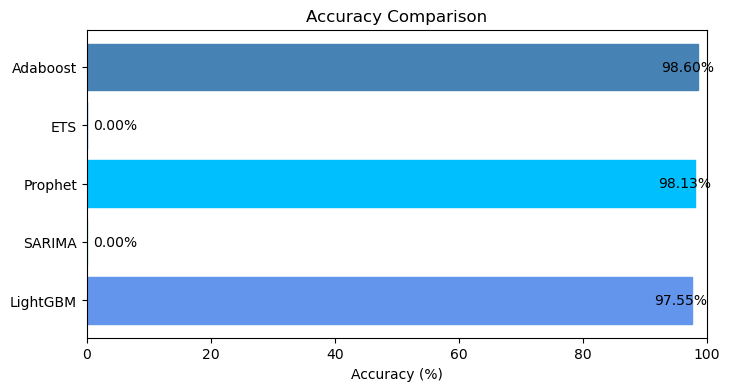

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Adaboost', 'ETS', 'Prophet', 'SARIMA', 'LightGBM']
accuracy_scores = [98.59503450566216, 0, 98.13390298335634, 0, 97.55224152558925]

# Create a horizontal bar plot
plt.figure(figsize=(8, 4))  # Set the figure size

# Choose distinct colors for bars
colors = ['steelblue', 'dodgerblue', 'deepskyblue', 'lightskyblue', 'cornflowerblue']

# Create a colormap for the bars
cmap = plt.cm.get_cmap('coolwarm', len(models))

# Plot the bars
bars = plt.barh(models, accuracy_scores, color=colors)

# Customize the appearance of the bars
for bar, color in zip(bars, colors):
    bar.set_color(color)
    width = bar.get_width()
    if width < 80:
        plt.text(width + 1, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center', color='black')
    else:
        plt.text(width - 6, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center', color='black')

plt.xlabel('Accuracy (%)')
plt.title('Accuracy Comparison')
plt.xlim(0, 100)  # Set x-axis limit to 0-100%
plt.gca().invert_yaxis()  # Invert y-axis to have Adaboost at the top

# Export the plot as an EPS file
plt.savefig('sealevel.eps', format='eps', bbox_inches='tight')

# Show the plot
plt.show()
